In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

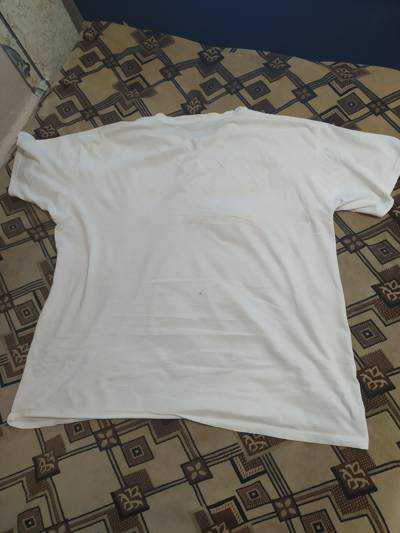

In [5]:
#path='./clothing-dataset-small/train/t-shirt'
path='/Users/shengmeian/Desktop/FUN_things/mlzoomcamp/Week_8/clothing-dataset-small/train/t-shirt'
name='0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname=f'{path}/{name}'
load_img(fullname)

In [6]:
# Changing img size
img=load_img(fullname, target_size=(299,299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F9C96A97250>


PIL mean python image

it has three channels red,green,blue, each is a 255*255 matrix

each pixel has (R,G,B) e.g.=(150,150,3), these values are unint8, with no sign

In [7]:
x=np.array(img)
x.shape

(299, 299, 3)

## Pre-tarined convolutional neural networks

pretrained models:
https://keras.io/api/applications/

Choosing Xception model

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model=Xception(weights='imagenet',input_shape=(299,299,3))

2021-11-23 23:08:01.599561: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
X=np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X=preprocess_input(X)

In [13]:
pred=model.predict(X)

In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.9533835),
  ('n04370456', 'sweatshirt', 0.00973702),
  ('n04033995', 'quilt', 0.003115628),
  ('n03188531', 'diaper', 0.0011530996),
  ('n03710637', 'maillot', 0.0010664057)]]

## Convolutional neural networks (CNN)

 ## Transfer learning


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_ds=train_gen.flow_from_directory(
    '/Users/shengmeian/Desktop/FUN_things/mlzoomcamp/Week_8/clothing-dataset-small/train',
    target_size=(150,150),
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [23]:
!ls -l clothing-dataset-small/train

total 0
drwxr-xr-x  243 shengmeian  staff   7776 Nov  8 12:35 dress
drwxr-xr-x  125 shengmeian  staff   4000 Nov  8 12:35 hat
drwxr-xr-x  457 shengmeian  staff  14624 Nov  8 12:35 longsleeve
drwxr-xr-x  186 shengmeian  staff   5952 Nov  8 12:35 outwear
drwxr-xr-x  470 shengmeian  staff  15040 Nov  8 12:35 pants
drwxr-xr-x  292 shengmeian  staff   9344 Nov  8 12:35 shirt
drwxr-xr-x  200 shengmeian  staff   6400 Nov  8 12:35 shoes
drwxr-xr-x  204 shengmeian  staff   6528 Nov  8 12:35 shorts
drwxr-xr-x  114 shengmeian  staff   3648 Nov  8 12:35 skirt
drwxr-xr-x  797 shengmeian  staff  25504 Nov  8 12:35 t-shirt


In [26]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [28]:
X,y=next(train_ds)

In [31]:
X.shape

(32, 150, 150, 3)

In [33]:
y.shape

(32, 10)

In [35]:
y[:5]
#first column for dress, second for hat... so the first cloth is pants

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
val_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds=val_gen.flow_from_directory(
    '/Users/shengmeian/Desktop/FUN_things/mlzoomcamp/Week_8/clothing-dataset-small/validation',
    target_size=(150,150),
    batch_size=32,
    shuffle=False)

Found 341 images belonging to 10 classes.


In [44]:
base_model=Xception(
    weights='imagenet',
             include_top=False,
             input_shape=(150,150,3))
base_model.trainable=False

In [54]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs)

pooling=keras.layers.GlobalAveragePooling2D()
vectors=pooling(base)

outputs=vectors
model=keras.Model(inputs,outputs)

In [55]:
preds=model.predict(X)

In [56]:
preds.shape

(32, 2048)